# Ford GoBike System Dataset insights

## by Khaled

## Investigation Overview

>This presentaion aims to show the main feature that resulted from the exploration part, Shortly these features are the average duration of the trips , the difference between average trip duration for customers and subscribers, and The effect of user_type on the average trip duration over all the week days

## Dataset Overview

>Ford GoBike System Data is a set includes information about individual rides made in a bike-sharing system covering the greater San Francisco

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
#importing data and the data wrangling part -Which can be found with detailed explanation in the exploring notebook-
data = pd.read_csv('201902-fordgobike-tripdata.csv')
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])
data = data.dropna(axis = 0 , subset =['member_birth_year'])
data['member_birth_year'] = data['member_birth_year'].astype(int)
data['age'] = 2019 - data['member_birth_year']
data['start_year'] = data['start_time'].dt.year
data['start_month'] = data['start_time'].dt.month
data['start_day'] = data['start_time'].dt.day_name()
data['duration_min'] = data['duration_sec'] / 60
data = data.query('member_gender != "Other"')
data.drop(columns = ['start_year','start_month','bike_id','duration_sec','start_time','member_birth_year','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude'],inplace = True)
data = data.query('age < 64')
data = data.query('duration_min < 52')

##  Average trip duration 

> A histogram chart is used for this visualization and it resulted that the average trip duration for riders is between 5 and 10 minutes as we can see.

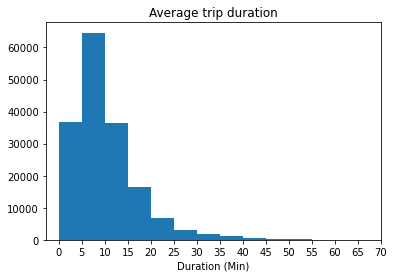

In [11]:
bins = np.arange(0 , data['duration_min'].max()+5 , 5)
labels = [0 ,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
ticks = ['{}'.format(v) for v in labels]
plt.hist(data = data , x = 'duration_min'  , bins = bins) ;
plt.xlabel('Duration (Min)') ;
plt.xticks(labels,ticks) ;
plt.title('Average trip duration') ;

## Difference between average trip duration for customers and subscribers
> The violin plot here shows that more customers have higher trip duration compared to the subscribers.

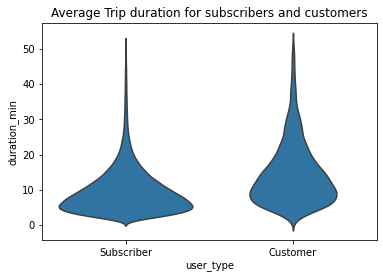

In [12]:
base_color = sb.color_palette()[0]
sb.violinplot(data = data , x = 'user_type' , y = 'duration_min' , color = base_color , inner= None) ;
plt.title('Average Trip duration for subscribers and customers');

## The effect of user_type on the average trip duration over all the week days
> This plot shows that the customers avearage trip duration over all the week days is higher than the customers avg trip duration

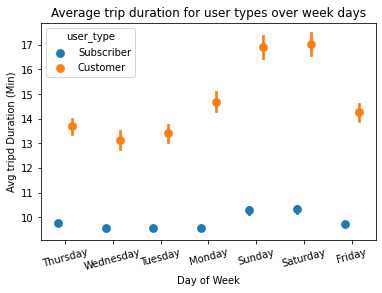

In [13]:
sb.pointplot(data=data, x='start_day', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg tripd Duration (Min)');
plt.xticks(rotation = 15 )
plt.title('Average trip duration for user types over week days');